In [3]:
import os
import pickle
import json
import time
import torch
import pandas as pd
import numpy as np
import torchvision.transforms as transforms

from PIL import Image
from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt

In [31]:
'_'.join(['32', 'asdfasf'])

'32_asdfasf'

In [24]:
os.path.join('data', '*', '*')

'data/*/*'

In [32]:
import re

tmp = glob('data/*/*')[:10]
for t in tmp:
    print(re.findall('[a-z]*[.][a-z]*', t))

['iuibfnuznahtjypdzokg.jpg']
['xecgojbrrqowrtjgwonr.jpg']
['ubkyoyxjbzszhfvesymx.png']
['gwomnosiycuhvnxhblqg.jpg']
['uhxcteeskzdnfvndzgfm.jpg']
['kpvtuvogchbgfthhxgmd.png']
['xkfwwnpdwwvfcistckfq.png']
['fmifbdhbsgbtggksrpan.png']
['uhiqynkzoosbgyzkjxiq.jpg']
['nylskmkmxgfetunnkkfv.jpg']


In [23]:
glob('data/*/*')

['data/L2_34/iuibfnuznahtjypdzokg.jpg',
 'data/L2_34/xecgojbrrqowrtjgwonr.jpg',
 'data/L2_34/ubkyoyxjbzszhfvesymx.png',
 'data/L2_34/gwomnosiycuhvnxhblqg.jpg',
 'data/L2_34/uhxcteeskzdnfvndzgfm.jpg',
 'data/L2_34/kpvtuvogchbgfthhxgmd.png',
 'data/L2_34/xkfwwnpdwwvfcistckfq.png',
 'data/L2_34/fmifbdhbsgbtggksrpan.png',
 'data/L2_34/uhiqynkzoosbgyzkjxiq.jpg',
 'data/L2_34/nylskmkmxgfetunnkkfv.jpg',
 'data/L2_34/woeedwxsvczmneviztut.png',
 'data/L2_34/fwloojcrmkndmjndmdcf.jpg',
 'data/L2_34/ituwmnbqjxdotnmnnqrj.jpg',
 'data/L2_34/xbwrosbcqoksihstsmwx.jpg',
 'data/L2_34/xjtlpwflnqsyrialitaa.jpg',
 'data/L2_34/lssncajpoguxpjeckhmz.jpg',
 'data/L2_34/txglcbrwogvdjrubcxwf.jpg',
 'data/L2_34/pykalqteoevagcmhpkpv.jpg',
 'data/L2_34/mtyothpuzgizxfawmsxz.png',
 'data/L2_34/msmdpsqeryuoxfmdewvx.png',
 'data/L2_34/reojhrxxoubxboqxwczp.jpg',
 'data/L2_34/asvfgwewegquowipclal.jpg',
 'data/L2_34/iqivmfggqvzvccmgfbej.jpg',
 'data/L2_34/mgyiourphicwkzbderlh.png',
 'data/L2_34/mnstjoxucfaikcnhbrbj.jpg',


In [57]:
print("num of classes", len(glob('data/*')))
print("num of images", sum([len(glob(directory+'/*')) for directory in glob('data/*')]))
for directory in glob('data/*'):
    print(directory, len(glob(directory+'/*')))

num of classes 20
num of images 25503
data/L2_34 419
data/L2_46 2214
data/L2_52 382
data/L2_20 410
data/L2_21 410
data/L2_25 6189
data/L2_12 518
data/L2_45 631
data/L2_33 6206
data/L2_27 426
data/L2_15 1509
data/L2_40 180
data/L2_30 364
data/L2_50 781
data/L2_39 454
data/L2_3 595
data/L2_41 593
data/L2_44 547
data/L2_10 1893
data/L2_24 782


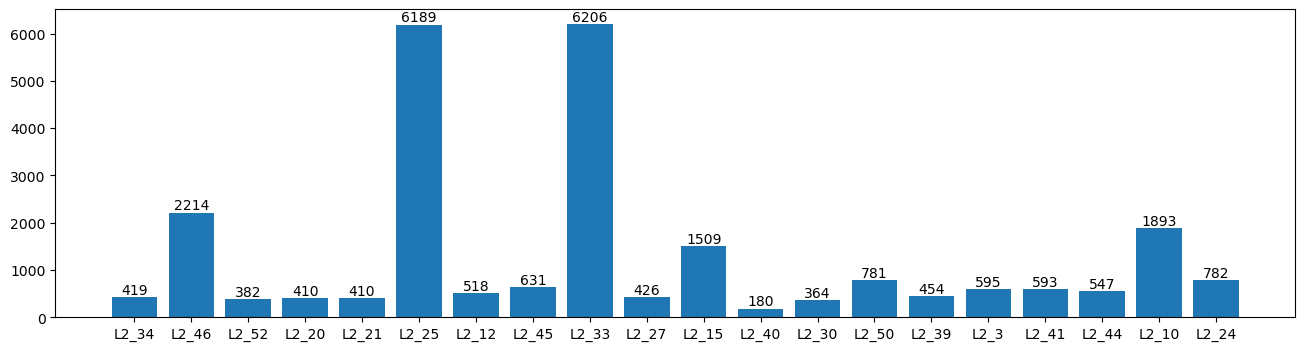

In [54]:
plt.figure(figsize=(16, 4))

bar = plt.bar(range(20), [len(glob(d+'/*')) for d in glob('data/*')])
plt.xticks(range(20), [d.split('/')[1] for d in glob('data/*')])

for rect in bar:
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, h, h, ha='center', va='bottom')

plt.show()

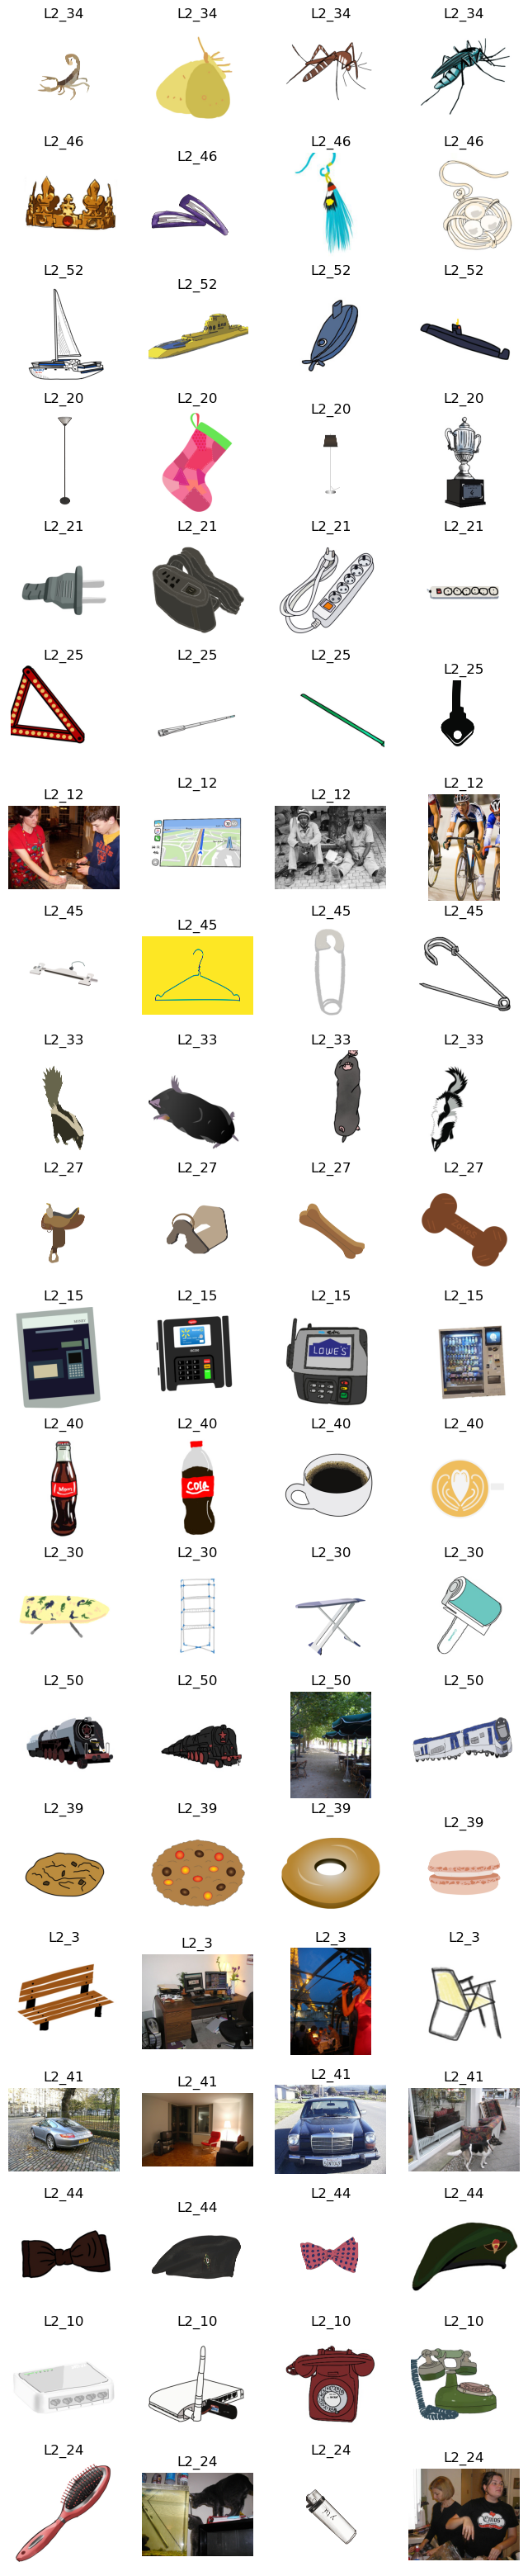

In [26]:
plt.figure(figsize=(8, 40))

for class_idx, directory in enumerate(glob('data/*')):
    for idx, image_path in enumerate(glob(directory+'/*')[:4], 1):
        image = Image.open(image_path)
        plt.subplot(20, 4, class_idx*4 + idx)
        plt.title(directory.replace('data/', ''))
        plt.imshow(image)
        plt.axis('off')

plt.show()

In [6]:
transform = transforms.Compose([
    transforms.ToTensor()
])

mean_w = mean_h = 0
mean_rgb = np.zeros(3)
nor_mean_rgb = torch.zeros(3)
nor_std_rgb = torch.zeros(3)

for directory in glob('data/*'):
    class_id = directory.replace('data/', '')
    w = h = 0
    rgb = np.zeros(3)
    nor_rgb = torch.zeros(3)
    nor_rgb2 = torch.zeros(3)
    
    num_images = len(glob(directory+'/*'))
    for image_path in glob(directory+'/*'):
        image = Image.open(image_path).convert('RGB')
        w += image.size[0] / num_images
        h += image.size[1] / num_images
        
        npimg = np.array(image)
        rgb += npimg.mean(axis=(0, 1)) / num_images
        
        norimg = transform(image)
        mean, std = norimg.mean([1, 2]), norimg.std([1, 2])
        nor_rgb += mean / num_images
        nor_rgb2 += std / num_images

    print(class_id, round(w), round(h), rgb, nor_rgb, nor_rgb2)
    
    mean_w += w / 20
    mean_h += h / 20
    mean_rgb += rgb / 20
    nor_mean_rgb += nor_rgb / 20
    nor_std_rgb += nor_rgb2 / 20

print(round(mean_w), round(mean_h), mean_rgb)
print(nor_mean_rgb, nor_std_rgb)

L2_34 1333 1389 [234.29223634 233.08402035 227.43856312] tensor([0.9188, 0.9141, 0.8919]) tensor([0.2007, 0.2091, 0.2436])
L2_46 1249 1342 [230.07210868 225.98226163 220.83572128] tensor([0.9022, 0.8862, 0.8660]) tensor([0.2068, 0.2306, 0.2580])
L2_52 1244 1290 [228.44516857 227.56227299 226.7774331 ] tensor([0.8959, 0.8924, 0.8893]) tensor([0.2282, 0.2318, 0.2354])
L2_20 1352 1622 [228.33145085 221.59386762 216.24289373] tensor([0.8954, 0.8690, 0.8480]) tensor([0.1882, 0.2265, 0.2506])
L2_21 1428 1480 [229.79122342 229.12437935 226.38938398] tensor([0.9011, 0.8985, 0.8878]) tensor([0.2001, 0.2086, 0.2236])
L2_25 1408 1495 [230.40265425 226.25492736 223.36845752] tensor([0.9035, 0.8873, 0.8760]) tensor([0.2058, 0.2253, 0.2462])
L2_12 646 577 [134.10480125 127.55522746 121.2228501 ] tensor([0.5259, 0.5002, 0.4754]) tensor([0.2632, 0.2547, 0.2544])
L2_45 1053 1062 [228.02018633 223.99156291 220.32802623] tensor([0.8942, 0.8784, 0.8640]) tensor([0.2031, 0.2242, 0.2385])
L2_33 1444 1496 [2

In [21]:
from glob import glob
import os
from datetime import datetime

search_dir = "/mydir/"
# remove anything from the list that is not a file (directories, symlinks)
# thanks to J.F. Sebastion for pointing out that the requirement was a list 
# of files (presumably not including directories)  
files = list(filter(os.path.isfile, glob(search_dir + "*")))
files.sort(key=lambda x: os.path.getmtime(x))

In [9]:
glob('data/*')

['data/L2_34',
 'data/L2_46',
 'data/L2_52',
 'data/L2_20',
 'data/L2_21',
 'data/L2_25',
 'data/L2_12',
 'data/L2_45',
 'data/L2_33',
 'data/L2_27',
 'data/L2_15',
 'data/L2_40',
 'data/L2_30',
 'data/L2_50',
 'data/L2_39',
 'data/L2_3',
 'data/L2_41',
 'data/L2_44',
 'data/L2_10',
 'data/L2_24']

In [17]:
in_real_images_class = ['3', '12', '24', '41', '50']

In [22]:
for directory in glob('data/*'):
    class_id = directory.replace('data/', '')
    num = class_id.replace('L2_', '')
    if num in in_real_images_class:
        date = set()

        for path in glob(directory+'/*'):
            d = datetime.fromtimestamp(os.path.getmtime(path)).strftime('%Y-%m-%d')
            date.add(d)

        print(directory)
        print(date)

data/L2_12
{'2022-09-28', '2021-12-17'}
data/L2_50
{'2022-09-28', '2021-12-17'}
data/L2_3
{'2022-09-28', '2021-12-17'}
data/L2_41
{'2022-09-28', '2021-12-17'}
data/L2_24
{'2022-09-28', '2021-12-17'}
